# Image Captioning

In [49]:
import os.path
from pathlib import Path
from transformers import VisionEncoderDecoderModel, ViTImageProcessor, AutoTokenizer
from PIL import Image
from IPython.display import display
import pandas as pd

In [16]:
hugging_face_reference = "nlpconnect/vit-gpt2-image-captioning"
path_to_dataset = 'Data/RSTPReid/'

## Initialize the model and the data set

In [28]:
# Some features. Just following the examples here.
max_length = 16
num_beams = 4
gen_kwargs = {"max_length": max_length, "num_beams": num_beams}

In [8]:
model = VisionEncoderDecoderModel.from_pretrained(hugging_face_reference)
feature_extractor = ViTImageProcessor.from_pretrained(hugging_face_reference)
tokenizer = AutoTokenizer.from_pretrained(hugging_face_reference)

C:\Users\Brecht\.conda\envs\cv_nlp\lib\site-packages\huggingface_hub\file_download.py:133: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\Brecht\.cache\huggingface\hub. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


In [22]:
def get_train_test_set():
    description = Path(path_to_dataset) / 'data_captions.json'
    if not os.path.exists(description):
        raise FileNotFoundError(f"Couldn't find the description file at {description}.")
    df = pd.read_json(description)
    train, test = df[df['split'] == 'train'], df[df['split'] == 'test']
    return train.reset_index(drop=True), test.reset_index(drop=True)

train_df, test_df = get_train_test_set()

## Investigating the Base Behaviour of the model (without retraining any layers)

In [35]:
example = train_df.head(n=1)
x = example['img_path'].values[0]

In [42]:
def predict(path_to_image):
    path_to_image = Path(path_to_dataset) / 'imgs' / path_to_image
    i_image = Image.open(path_to_image)
    if i_image.mode != "RGB":
        print("Some images are not RGB. Maybe change this in a preprocessing step?")
        i_image = i_image.convert(mode="RGB")
    pixel_values = feature_extractor(images=[i_image], return_tensors='pt').pixel_values
    output_ids = model.generate(pixel_values, **gen_kwargs)
    predictions = tokenizer.batch_decode(output_ids, skip_special_tokens=True)
    predictions = [prediction.strip() for prediction in predictions]
    return predictions

In [43]:
predictions = predict(x)

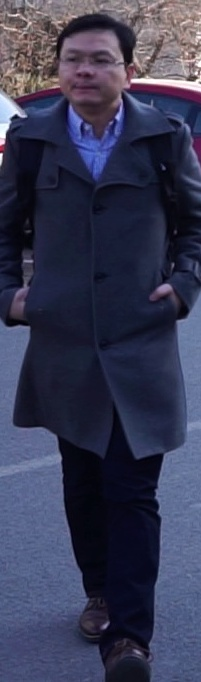

['a man in a suit and tie walking down the street']


In [48]:
display(ImageDisplay(filename=Path(path_to_dataset) / 'imgs' / x))
print(predictions)